In [1]:
import numpy as np
import seaborn as sns



Disabling warning output

In [2]:
import warnings
warnings.filterwarnings('ignore')

Setting up a graph output window

In [3]:
import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5

mlp.rcParams['xtick.major.size'] = 14
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 12
mlp.rcParams['xtick.color'] = 'black'

mlp.rcParams['ytick.major.size'] = 14
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 12
mlp.rcParams['ytick.color'] = 'black'

mlp.rcParams['axes.labelsize'] = 14
mlp.rcParams['axes.titlesize'] = 14
mlp.rcParams['axes.titlecolor'] = 'black'
mlp.rcParams['axes.labelcolor'] = 'black'

Data description:
- REF
- Company (Manufacturer)
- Company Location
- Review Date - Year
- Country of Bean Origin
- Specific Bean Origin or Bar Name
- Cocoa Percent
- Ingredients
- Most Memorable Characteristics
- Rating

In [4]:
import pandas as pd

# Creation of DataFrame
df = pd.read_csv('cacao.csv', encoding='windows-1252')

# Printing of 5 upper rows
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50
1,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25
2,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
3,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
4,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75


In [5]:
# Data description
df.shape

(2693, 10)

In [6]:
# Data Review with type of data and count of non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2693 non-null   int64  
 1   Company (Manufacturer)            2693 non-null   object 
 2   Company Location                  2693 non-null   object 
 3   Review Date                       2693 non-null   int64  
 4   Country of Bean Origin            2693 non-null   object 
 5   Specific Bean Origin or Bar Name  2693 non-null   object 
 6   Cocoa Percent                     2693 non-null   object 
 7   Ingredients                       2693 non-null   object 
 8   Most Memorable Characteristics    2693 non-null   object 
 9   Rating                            2693 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 210.5+ KB


In [7]:
# Statistics for numerical data
df.describe()

,REF,Review Date,Rating
count,2693.000000,2693.000000,2693.000000
mean,1514.082807,2014.871147,3.197828
std,804.025376,4.304197,0.440790
min,5.000000,2006.000000,1.000000
25%,849.000000,2012.000000,3.000000
50%,1526.000000,2015.000000,3.250000
75%,2202.000000,2018.000000,3.500000
max,2876.000000,2023.000000,4.000000


In [8]:
# Statistics for non numerical data
df.describe(include='object').T

,count,unique,top,freq
Company (Manufacturer),2693,616,Soma,57
Company Location,2693,68,U.S.A.,1227
Country of Bean Origin,2693,64,Peru,265
Specific Bean Origin or Bar Name,2693,1720,Madagascar,56
Cocoa Percent,2693,47,70%,1126
Ingredients,2693,23,"3- B,S,C",1100
Most Memorable Characteristics,2693,2650,"creamy, nutty, cocoa",4


In [9]:
# Converting Cocoa Percent to float
df['Cocoa Percent'] = df['Cocoa Percent'].apply(lambda x: x[:-1]).astype('float')
df['Cocoa Percent'].dtypes

dtype('float64')

In [10]:
# Count of null data
df.isna().sum()

REF                                 0
Company (Manufacturer)              0
Company Location                    0
Review Date                         0
Country of Bean Origin              0
Specific Bean Origin or Bar Name    0
Cocoa Percent                       0
Ingredients                         0
Most Memorable Characteristics      0
Rating                              0
dtype: int64

In [60]:
# Check if any data with length = 0
for col in df.columns:
    print(col, df[col].apply(lambda x: 1 if len(str(x)) == 0 else 0).sum())

REF 0
Company (Manufacturer) 0
Company Location 0
Review Date 0
Country of Bean Origin 0
Specific Bean Origin or Bar Name 0
Cocoa Percent 0
Ingredients 0
Most Memorable Characteristics 0
Rating 0


In [61]:
# List of unique values for "Ingredients"
df['Ingredients'].unique()

array(['3- B,S,C', '2- B,S', '3- B,S, L', '4- B,S,C,L', '4- B,S,C,V',
       '6-B,S,C,V,L,Sa', '5-B,S,C,V,Sa', '5- B,S,C,V,L', ' ',
       '4- B,S,V,L', '2- B,S*', '1- B', '3- B,S*,C', '3- B,S,L',
       '3- B,S,V', '4- B,S*,C,L', '4- B,S,C,Sa', '3- B,S*,Sa',
       '4- B,S*,C,Sa', '4- B,S*,V,L', '2- B,C', '4- B,S*,C,V',
       '5- B,S,C,L,Sa'], dtype=object)

In [66]:
# Fill missing data with value "unknown"
df['Ingredients'] = df['Ingredients'].apply(lambda x: 'unknown' if len(str(x)) < 2 else x)

In [63]:
# check for duplicate data
df.duplicated().sum()

0

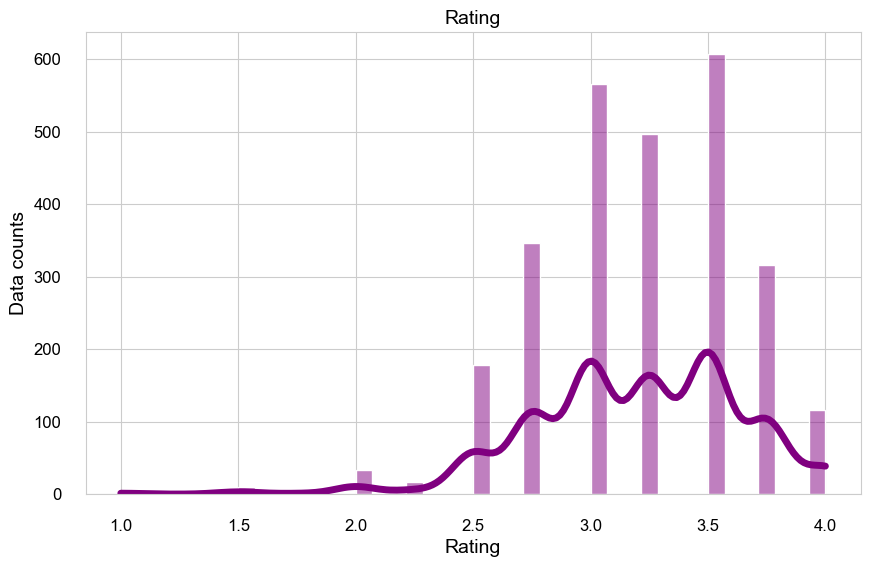

In [15]:
from matplotlib import pyplot as plt

# Histogram - Data distibution based on Rating
fig = plt.figure()
fig.set_size_inches(10, 6)
sns.histplot(df['Rating'], kde=True, color='purple')
plt.title('Rating')
plt.xlabel('Rating')
plt.ylabel('Data counts')
fig.savefig('Rating_Distribution.png')
plt.show()

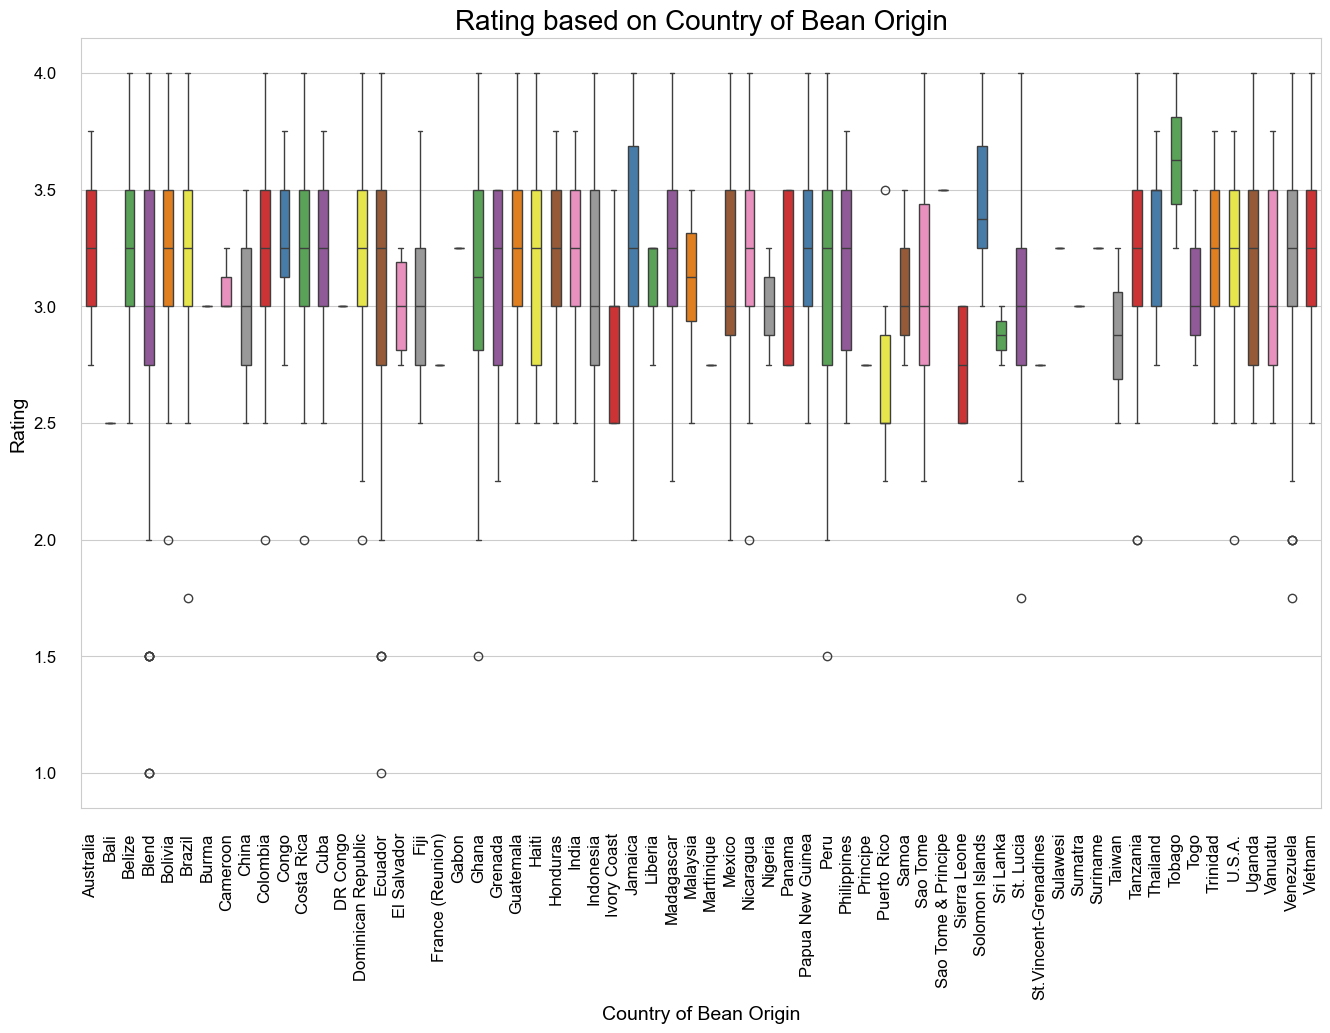

In [16]:
# Rating based on Country of Bean Origin

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='Rating', x=df['Country of Bean Origin'].astype('category'), data=df, palette='Set1', width=.5)
plt.title('Rating based on Country of Bean Origin', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Country of Bean Origin')
plt.ylabel('Rating')
fig.savefig('Rating_vs_Country_of_Bean_Origin.png')

plt.show()

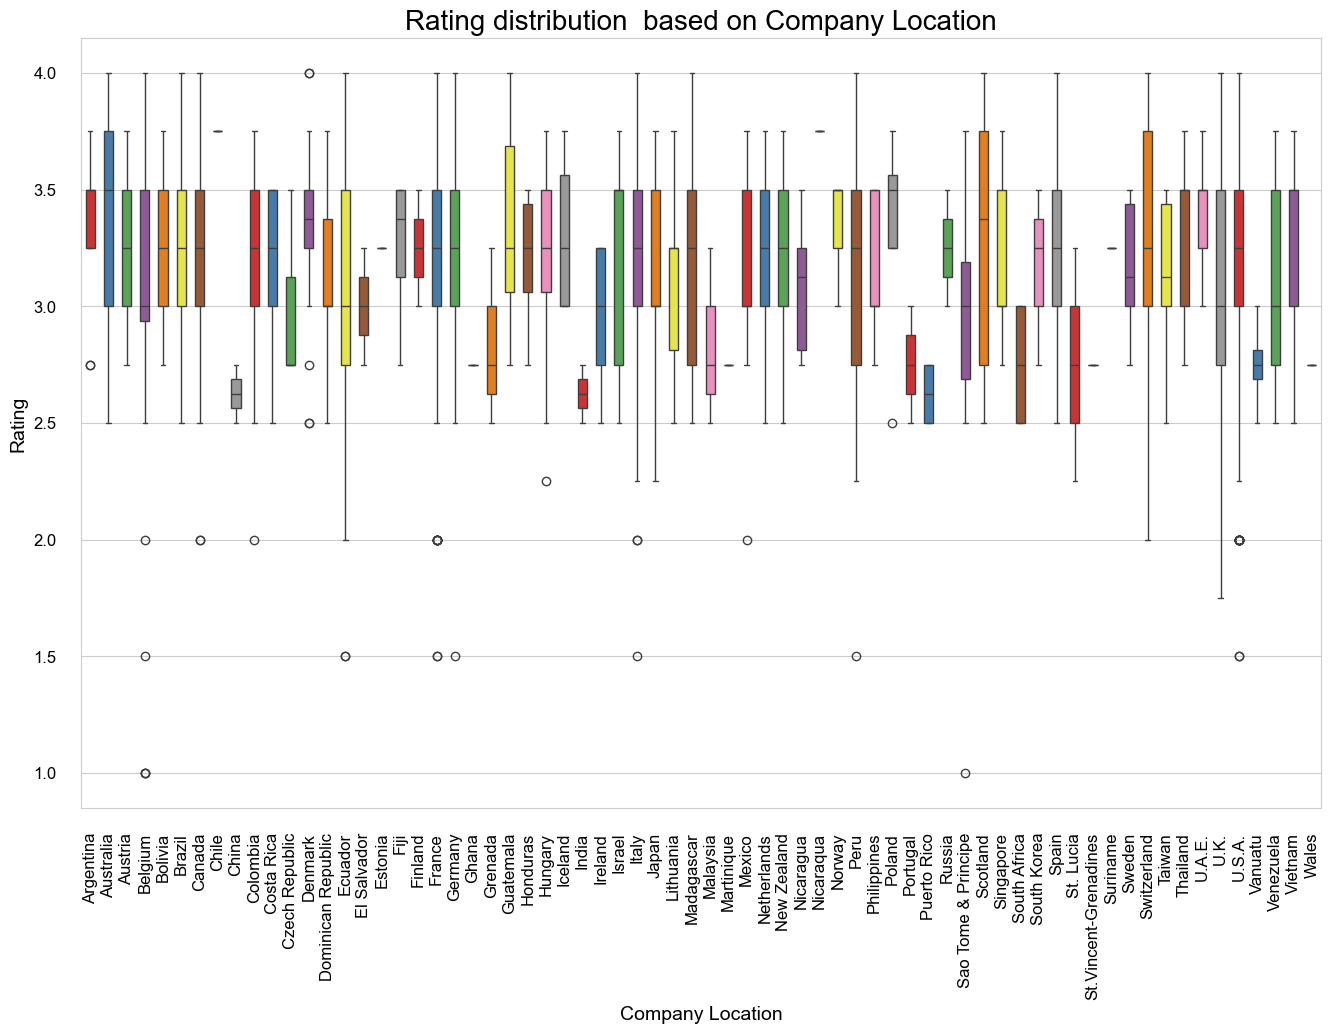

In [17]:
# Rating distribution  based on Company Location
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='Rating', x=df['Company Location'].astype('category'), data=df, palette='Set1', width=.5)
plt.title('Rating distribution  based on Company Location', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Company Location')
plt.ylabel('Rating')
fig.savefig('Rating_vs_Company_Location.png')

plt.show()

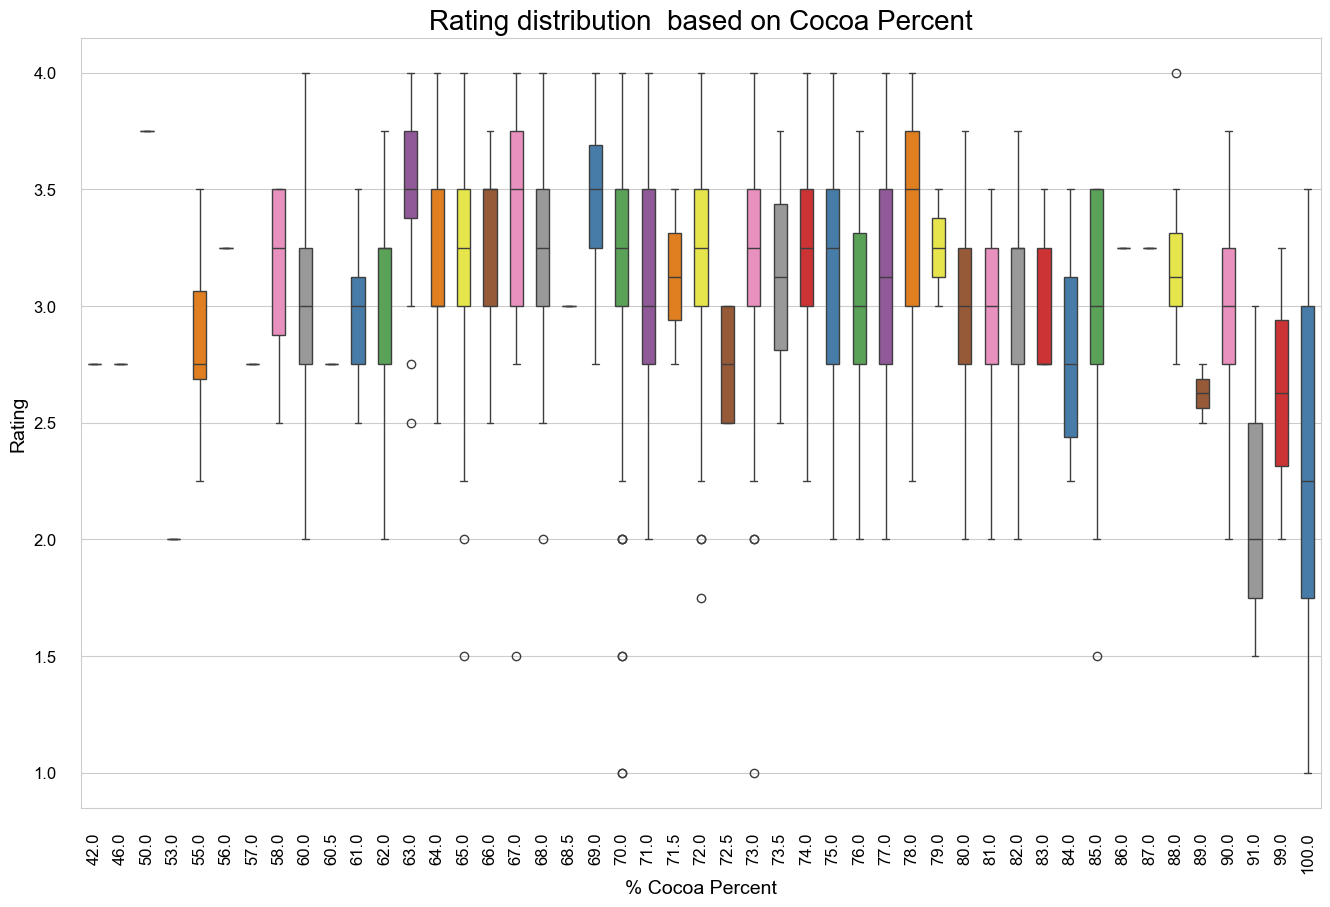

In [18]:
# Rating distribution  based on Cocoa Percent 
fig = plt.figure()
fig.set_size_inches(16, 10)
sns.boxplot(y='Rating', x=df['Cocoa Percent'].astype('category'), data=df, palette='Set1', width=.5)
plt.title('Rating distribution  based on Cocoa Percent', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('% Cocoa Percent')
plt.ylabel('Rating')
fig.savefig('Rating_vs_Cocoa_Percent.png')

plt.show()

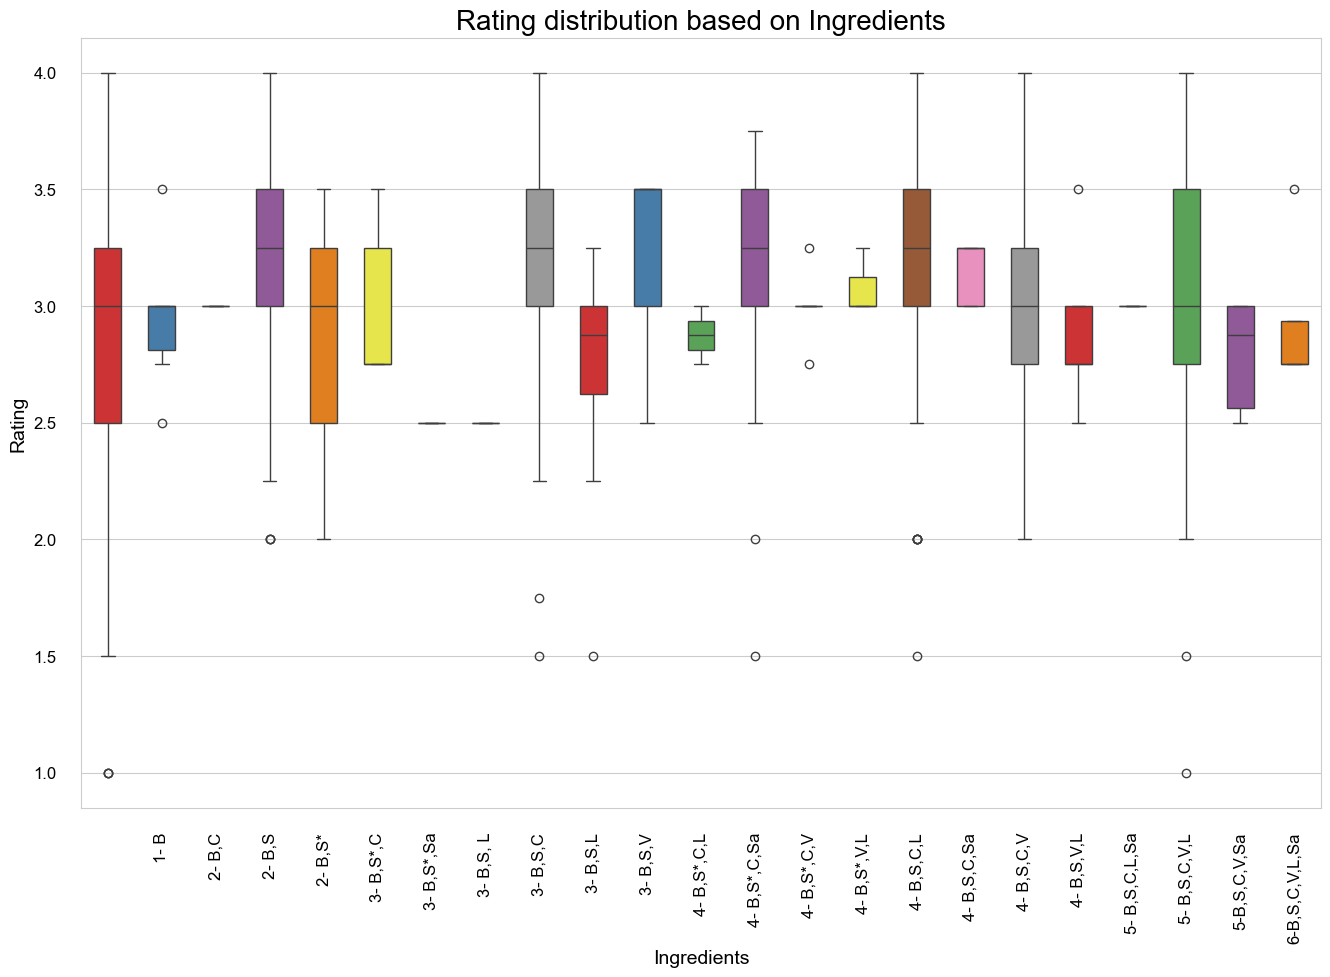

In [19]:
# Rating distribution based on Ingredients
fig = plt.figure()
fig.set_size_inches(16, 10)
sns.boxplot(y='Rating', x=df['Ingredients'].astype('category'), data=df, palette='Set1', width=.5)
plt.title('Rating distribution based on Ingredients', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Ingredients')
plt.ylabel('Rating')
fig.savefig('Ingredients.png')

plt.show()

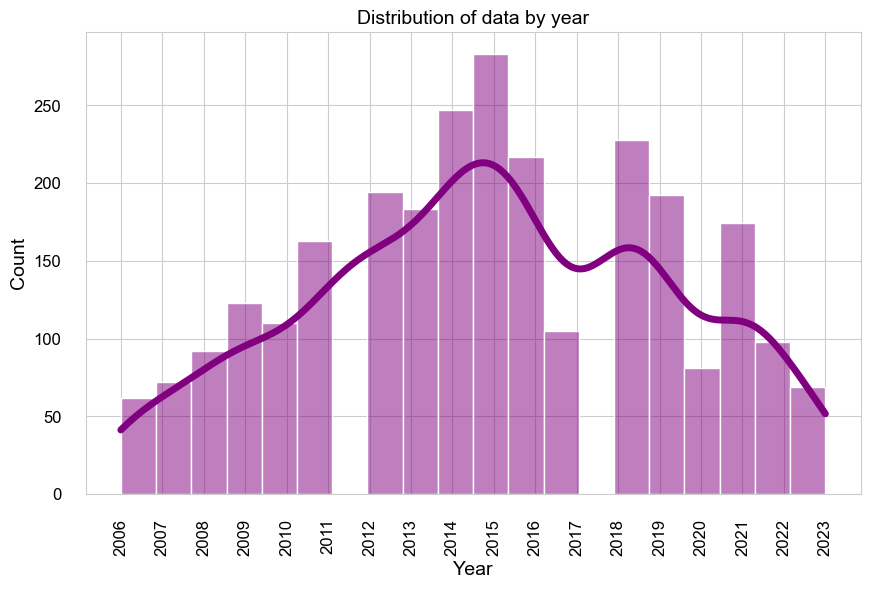

In [20]:
# Distribution of data by year
fig = plt.figure(figsize=(10, 6))
sns.histplot(df['Review Date'], kde=True, color='purple')
plt.title('Distribution of data by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(range(2006, 2024, 1), rotation=90)
fig.savefig('Distribution_by_Date.png')
plt.show()

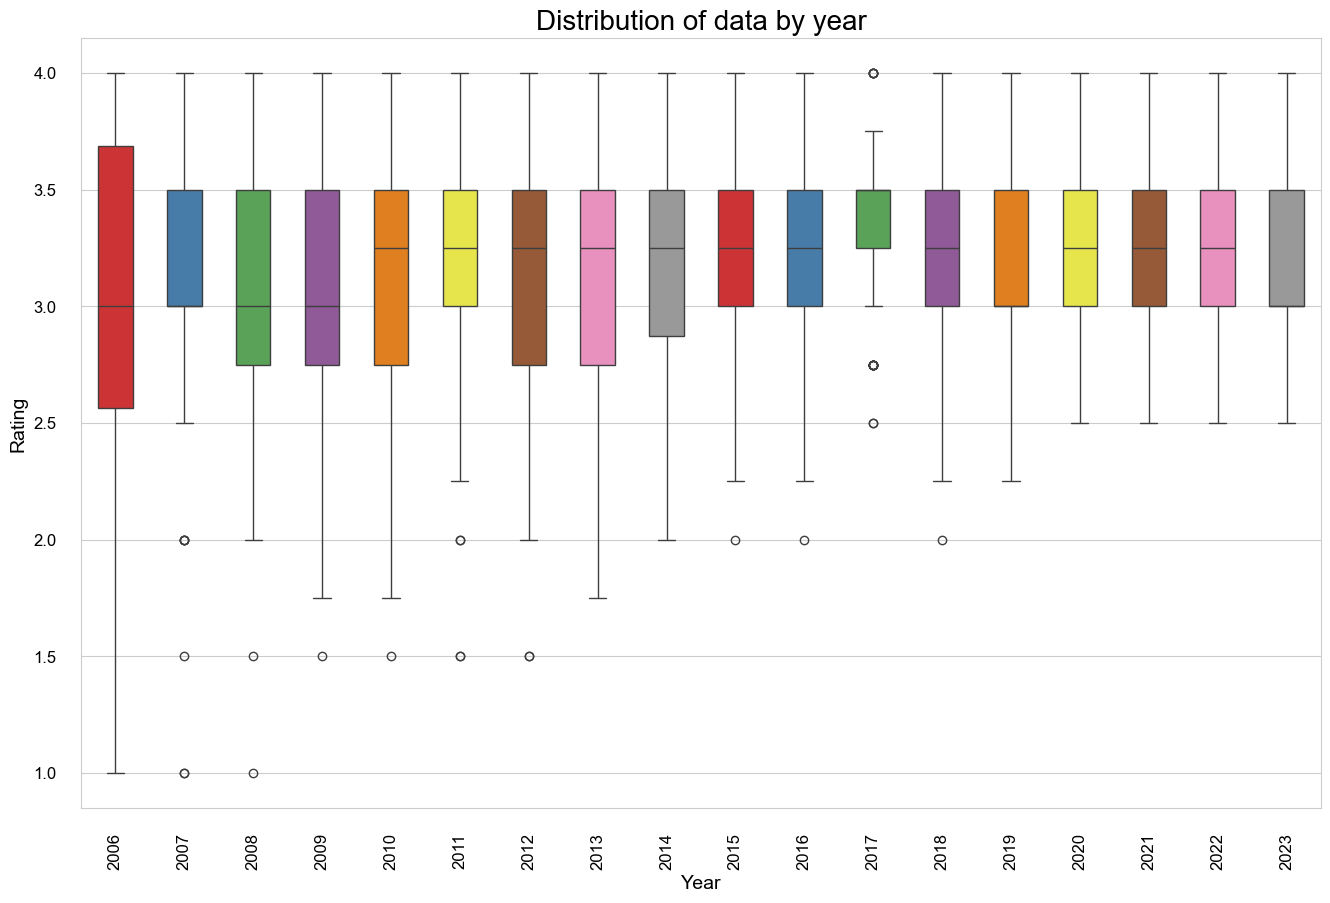

In [21]:
# Rating by Year
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='Rating', x=df['Review Date'].astype('category'), data=df, palette='Set1', width=.5)
plt.title('Distribution of data by year', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Rating')
fig.savefig('Rating_vs_Review_Date.png')

plt.show()

In [22]:
# Selection of data with high rating (more than 4)
df_high_rating = df[df['Rating'] >= 4]
df_high_rating.shape

(116, 10)

In [31]:
# Selection of data with low rating (less than 2)
df_low_rating = df[df['Rating'] <= 2.0]
df_low_rating.shape

(50, 10)

In [23]:
# Function to count the number of unique words
def most_common_words_generate(data):
    most_common_words = {}

    for sentence in data:
        for word in sentence.split(','):
            word = word.strip().lower()
            most_common_words[word] = most_common_words.get(word, 0) + 1
    return most_common_words

In [24]:
# Calculation and display of the most popular (top 10) characteristics of chocolate for the entire sample and for the sample with the highest rating
most_common_words_all = most_common_words_generate(df['Most Memorable Characteristics'])
most_common_words_high_rating = most_common_words_generate(df_high_rating['Most Memorable Characteristics'])
print(sorted(most_common_words_high_rating.items(), key=lambda x: x[1], reverse=True)[:10])
print(sorted(most_common_words_all.items(), key=lambda x: x[1], reverse=True)[:10])   

[('creamy', 37), ('cocoa', 24), ('nutty', 17), ('complex', 10), ('banana', 7), ('spicy', 6), ('floral', 6), ('tart', 5), ('balanced', 5), ('sticky', 5)]
[('sweet', 289), ('cocoa', 272), ('nutty', 271), ('roasty', 227), ('earthy', 202), ('creamy', 197), ('fatty', 177), ('sandy', 174), ('floral', 153), ('intense', 144)]


In [25]:
# Creation of word cloud
from wordcloud import WordCloud

def wordCloudFunction(datas,numWords):
    text = ' '.join(data for data in datas)
    wordcloud = WordCloud(background_color='white',
                          width=1000,height=400, scale=1, max_words=numWords
                         ).generate(text)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

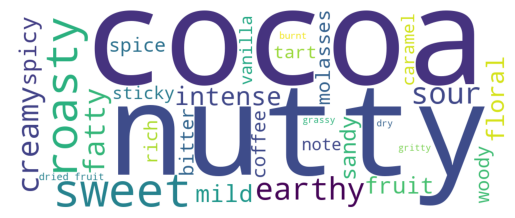

In [28]:
# Word cloud (30) for the entire sample
wordCloudFunction(df['Most Memorable Characteristics'],30)

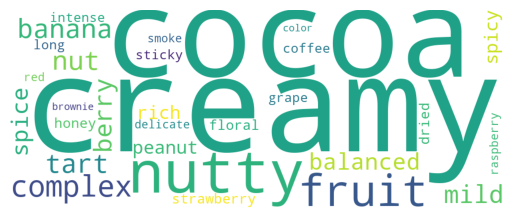

In [29]:
# Word cloud (30) for chocolate with high rating
wordCloudFunction(df_high_rating['Most Memorable Characteristics'],30)

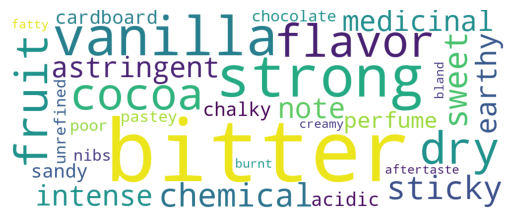

In [32]:
# Word cloud (30) for chocolate with low rating
wordCloudFunction(df_low_rating['Most Memorable Characteristics'],30)

In [33]:
# Descriptive statistics for the high-ranking sample (categorical features)
df_high_rating.describe(include='object').T

,count,unique,top,freq
Company (Manufacturer),116,54,Soma,15
Company Location,116,17,U.S.A.,45
Country of Bean Origin,116,26,Venezuela,20
Specific Bean Origin or Bar Name,116,107,Chuao,3
Ingredients,116,6,"3- B,S,C",61
Most Memorable Characteristics,116,116,"light color, fruit, yogurt",1


In [34]:
# Descriptive statistics for the high-ranking sample (numerical features)
df_high_rating.describe()

,REF,Review Date,Cocoa Percent,Rating
count,116.000000,116.000000,116.000000,116.0
mean,1335.836207,2013.905172,70.750000,4.0
std,805.965399,4.309703,3.364456,0.0
min,48.000000,2006.000000,60.000000,4.0
25%,736.000000,2011.000000,70.000000,4.0
50%,1177.000000,2013.000000,70.000000,4.0
75%,2025.000000,2017.000000,72.000000,4.0
max,2852.000000,2023.000000,88.000000,4.0


In [35]:
# Descriptive statistics for the low-ranking sample (categorical features)
df_low_rating.describe(include='object').T

,count,unique,top,freq
Company (Manufacturer),50,40,Michel Cluizel,3
Company Location,50,13,U.S.A.,17
Country of Bean Origin,50,16,Blend,19
Specific Bean Origin or Bar Name,50,46,Venezuela,2
Ingredients,50,9,,14
Most Memorable Characteristics,50,50,"very nutty, very bitter",1


In [36]:
# Descriptive statistics for the low-ranking sample (numerical features)
df_low_rating.describe()

,REF,Review Date,Cocoa Percent,Rating
count,50.000000,50.000000,50.000000,50.000000
mean,447.820000,2008.940000,79.200000,1.805000
std,469.031424,2.937512,13.237239,0.312536
min,5.000000,2006.000000,53.000000,1.000000
25%,112.500000,2006.250000,70.000000,1.500000
50%,290.000000,2008.000000,75.000000,2.000000
75%,691.750000,2011.000000,90.750000,2.000000
max,2154.000000,2018.000000,100.000000,2.000000


In [37]:
# Unique Company Manufacturer list and data counts
df['Company (Manufacturer)'].value_counts()

Company (Manufacturer)
Soma                     57
Fresco                   40
Bonnat                   33
Arete                    32
A. Morin                 29
                         ..
Nikoa                     1
Nina                      1
Nugali                    1
Oakland Chocolate Co.     1
Ki' Xocolatl              1
Name: count, Length: 616, dtype: int64

In [38]:
# Calculation of average rating for Country of Bean Origin
df_by_cocoa_origin = df.groupby('Country of Bean Origin', group_keys=False)[['Rating']].mean()
df_by_cocoa_origin.sort_values(by='Rating', ascending=False, inplace=True)
df_by_cocoa_origin

,Rating
Country of Bean Origin,
Tobago,3.625000
Sao Tome & Principe,3.500000
Solomon Islands,3.450000
Congo,3.318182
Thailand,3.300000
...,...
Sierra Leone,2.750000
France (Reunion),2.750000
Martinique,2.750000


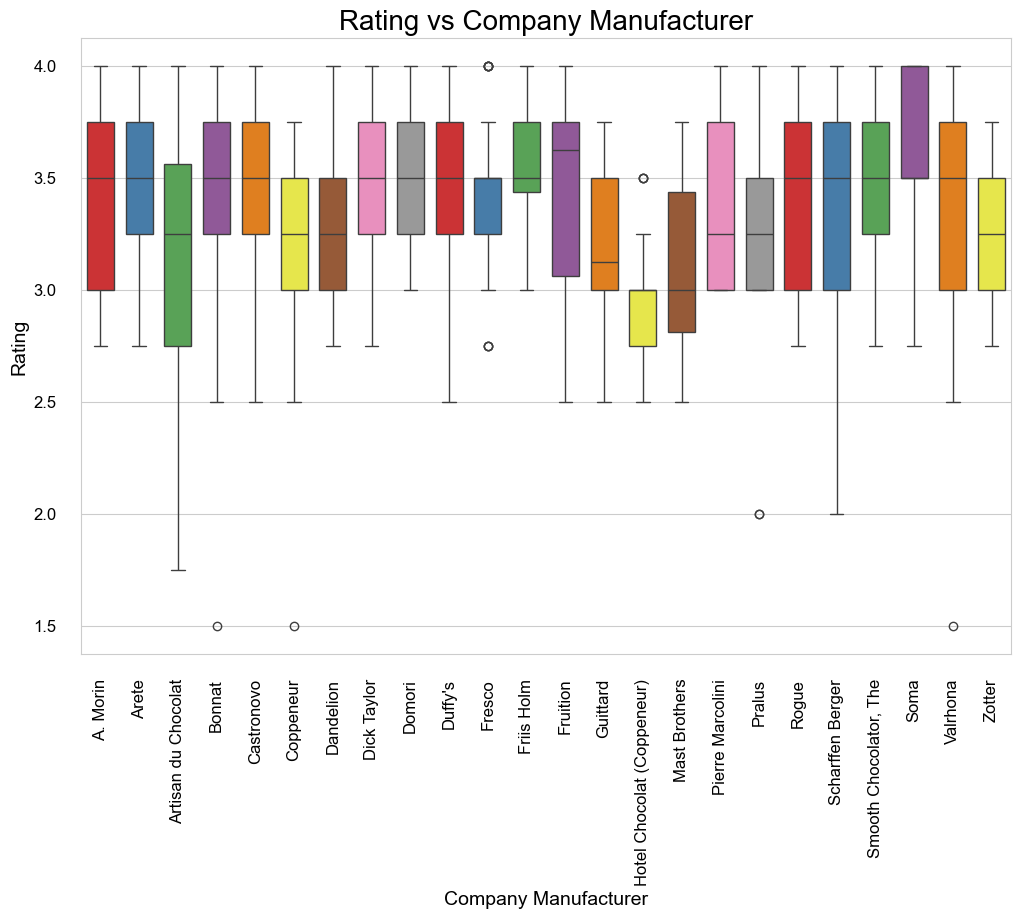

In [39]:
# Data sample of Companies where data > 15
filtered_manufacturers = df['Company (Manufacturer)'].value_counts()[df['Company (Manufacturer)'].value_counts() > 15].index

filtered_df = df[df['Company (Manufacturer)'].isin(filtered_manufacturers)]

# Boxplot - Rating based on Company manufacturer
plt.figure(figsize=(12, 8))
sns.boxplot(x='Company (Manufacturer)', y='Rating', data=filtered_df, palette='Set1', width=.7)
plt.title('Rating vs Company Manufacturer', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Company Manufacturer')
plt.ylabel('Rating')
fig.savefig('Rating_vs_Company_Manufacturer.png')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Tobago Estate (Pralus)'),
  Text(1, 0, 'Heirloom Cacao Preservation (Zokoko)'),
  Text(2, 0, 'Ocelot'),
  Text(3, 0, 'Matale'),
  Text(4, 0, 'Patric'),
  Text(5, 0, 'Idilio (Felchlin)'),
  Text(6, 0, 'Nikoa'),
  Text(7, 0, 'Cuna de Piedra'),
  Text(8, 0, "Chocola'te"),
  Text(9, 0, 'Landmark (Amano)')])

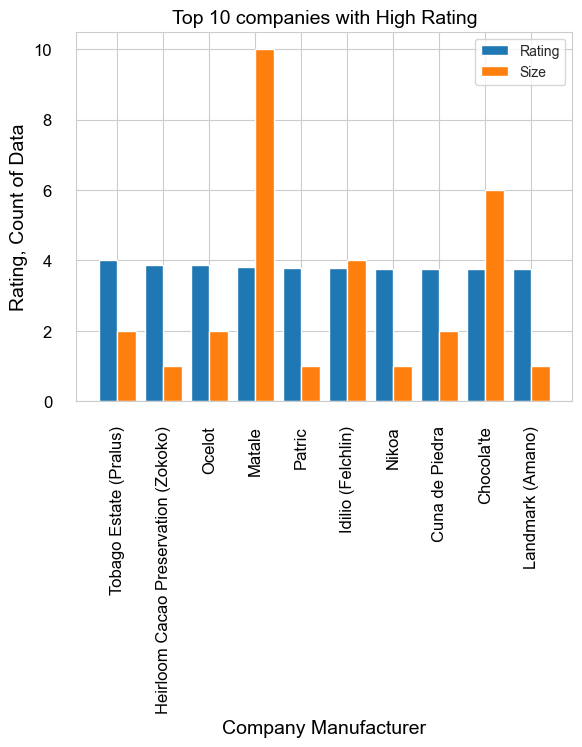

In [45]:
# Top 10 companies based on Rating

top_10_companies_by_rating = df.groupby('Company (Manufacturer)')['Rating'].mean().sort_values(ascending=False)[:10]
top_10_companies_by_rating_count = df[df['Company (Manufacturer)'].isin(top_10_companies_by_rating.index)].groupby('Company (Manufacturer)')['Rating'].size()
X_axis = np.arange(len(top_10_companies_by_rating)) 
plt.bar(X_axis - 0.2, top_10_companies_by_rating, 0.4, label = 'Rating')
plt.bar(X_axis + 0.2, top_10_companies_by_rating_count, 0.4, label = 'Size')
plt.xticks(X_axis, top_10_companies_by_rating.index) 
plt.xlabel("Company Manufacturer") 
plt.ylabel("Rating, Count of Data") 
plt.title("Top 10 companies with High Rating") 
plt.legend() 
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Soma'),
  Text(1, 0, 'Friis Holm'),
  Text(2, 0, 'Arete'),
  Text(3, 0, 'Smooth Chocolator, The'),
  Text(4, 0, 'Domori'),
  Text(5, 0, 'Dick Taylor'),
  Text(6, 0, 'Castronovo'),
  Text(7, 0, "Duffy's"),
  Text(8, 0, 'Bonnat'),
  Text(9, 0, 'Fruition')])

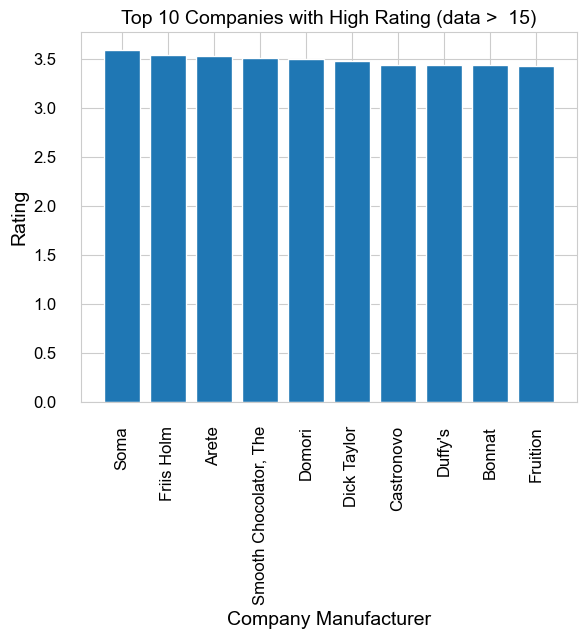

In [41]:
# Top 10 Companies based on Rating when data > 15
top_10_companies_by_rating_more_15 = filtered_df.groupby('Company (Manufacturer)')['Rating'].mean().sort_values(ascending=False)[:10]
plt.bar(top_10_companies_by_rating_more_15.index, top_10_companies_by_rating_more_15)
plt.xlabel("Company Manufacturer") 
plt.ylabel("Rating") 
plt.title("Top 10 Companies with High Rating (data >  15)") 
plt.xticks(rotation=90)

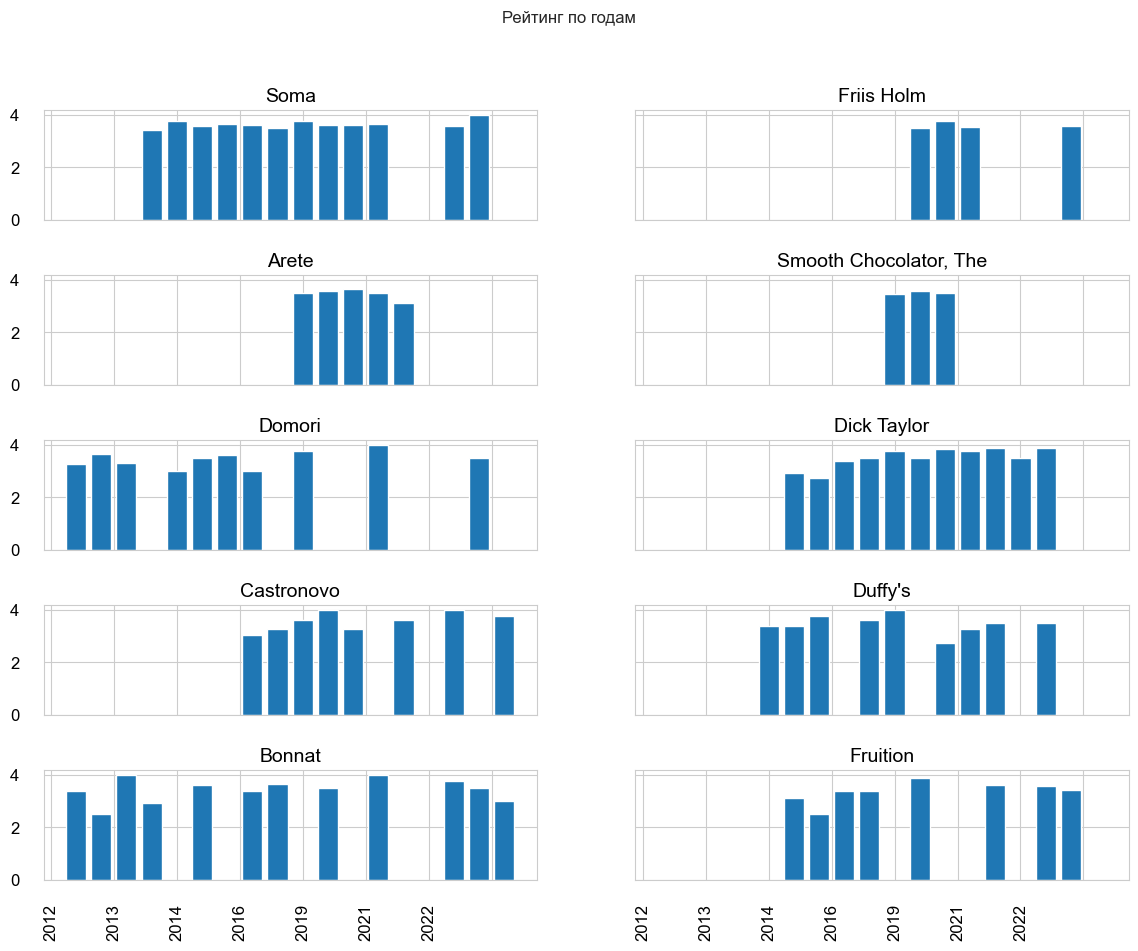

In [44]:
# Rating by Year - top 10 Companies, data > 15
fig, axs = plt.subplots(5, 2, sharex=True, sharey=True)
fig.suptitle('Рейтинг по годам')
fig.set_size_inches(14, 10)
fig.subplots_adjust(hspace=0.5)

i = 0
j = 0
for company in top_10_companies_by_rating_more_15.index:
    df_company = filtered_df[filtered_df['Company (Manufacturer)'] == company].groupby('Review Date')['Rating'].mean()
    axs[i, j].bar(df_company.index, df_company)
    axs[i, j].set_title(company)
    axs[i, j].set_xticklabels(df_company.index, rotation=90)   
    i = i + 1 if j == 1 else i
    j = j + 1 if j == 0 else 0
    

In [46]:
# List of numerical features
numeric_columns = df.loc[:,df.dtypes!=object].columns
numeric_columns

Index(['REF', 'Review Date', 'Cocoa Percent', 'Rating'], dtype='object')

In [49]:
# List of categorical features
categorical_columns = df.loc[:,df.dtypes==object].columns
categorical_columns

Index(['Company (Manufacturer)', 'Company Location', 'Country of Bean Origin',
       'Specific Bean Origin or Bar Name', 'Ingredients',
       'Most Memorable Characteristics'],
      dtype='object')

In [47]:
# Correlation for numerical features
df[numeric_columns].corr()

,REF,Review Date,Cocoa Percent,Rating
REF,1.000000,0.993219,0.001502,0.106136
Review Date,0.993219,1.000000,0.000523,0.106492
Cocoa Percent,0.001502,0.000523,1.000000,-0.139617
Rating,0.106136,0.106492,-0.139617,1.000000


In [50]:
# Descriptive statistics for categorical features
df[categorical_columns].describe().T

,count,unique,top,freq
Company (Manufacturer),2693,616,Soma,57
Company Location,2693,68,U.S.A.,1227
Country of Bean Origin,2693,64,Peru,265
Specific Bean Origin or Bar Name,2693,1720,Madagascar,56
Ingredients,2693,23,"3- B,S,C",1100
Most Memorable Characteristics,2693,2650,"creamy, nutty, cocoa",4


In [51]:
# Average Rating by Year
average_rating_by_country_origin_pivot = pd.pivot_table(df, values='Rating', index=['Review Date'], columns=['Country of Bean Origin'], aggfunc=np.mean)
average_rating_by_country_origin_pivot

Country of Bean Origin,Australia,Bali,Belize,Blend,Bolivia,Brazil,Burma,Cameroon,China,Colombia,...,Tanzania,Thailand,Tobago,Togo,Trinidad,U.S.A.,Uganda,Vanuatu,Venezuela,Vietnam
Review Date,,,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,2.583333,4.000000,3.000000,NaN,NaN,NaN,2.937500,...,NaN,NaN,NaN,NaN,2.500000,3.000000,NaN,3.000000,3.295455,NaN
2007,NaN,NaN,NaN,2.883333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,3.354167,NaN
2008,NaN,NaN,NaN,3.055556,2.916667,3.500000,NaN,NaN,NaN,3.000000,...,2.250000,NaN,NaN,NaN,3.375000,NaN,2.500000,NaN,3.178571,NaN
2009,NaN,NaN,NaN,3.050000,3.125000,2.900000,NaN,NaN,NaN,2.875000,...,2.500000,NaN,NaN,NaN,NaN,3.125000,NaN,3.750000,3.138889,3.750000
2010,NaN,NaN,2.750000,3.175000,NaN,3.250000,NaN,NaN,NaN,3.500000,...,NaN,NaN,NaN,NaN,3.083333,3.500000,NaN,NaN,3.035714,3.250000
2011,3.25,NaN,3.250000,3.031250,3.500000,3.500000,NaN,NaN,NaN,3.000000,...,3.500000,NaN,NaN,NaN,2.500000,2.250000,NaN,NaN,3.416667,3.000000
2012,NaN,NaN,NaN,3.131579,3.055556,3.166667,NaN,NaN,NaN,3.166667,...,3.375000,NaN,4.00,NaN,3.500000,3.291667,NaN,3.250000,3.180556,3.428571
2013,NaN,NaN,3.208333,3.583333,3.142857,3.281250,3.0,NaN,NaN,2.750000,...,NaN,NaN,3.25,NaN,3.375000,3.250000,NaN,3.500000,3.287500,3.500000
2014,NaN,NaN,3.187500,3.140625,2.968750,3.500000,NaN,NaN,NaN,3.250000,...,NaN,NaN,NaN,NaN,3.291667,3.392857,3.000000,3.083333,3.250000,3.062500


In [72]:
# Creation copy of data for prediction
df_pred = df.copy()

In [73]:
# Data preparation for ML
list_of_ingredients_from_df = set([ing for ing in df['Ingredients'].values.tolist()])

In [74]:
# List of ingredients
list_of_ingredients = []
for element in list_of_ingredients_from_df:
    ingredients = element.split('-')[-1]
    for ing in ingredients.split(','):
        if ing.strip() not in list_of_ingredients:
            list_of_ingredients.append(ing.strip())
list_of_ingredients

['B', 'S', 'C', 'L', 'V', 'S*', 'Sa', 'unknown']

In [75]:
# Descributive statistics for data with unkown ingredients
unknown_ingredients = df_pred[df_pred['Ingredients'] == 'unknown']
unknown_ingredients.describe()

,REF,Review Date,Cocoa Percent,Rating
count,87.000000,87.000000,87.000000,87.000000
mean,819.908046,2011.241379,75.655172,2.810345
std,531.408673,2.840592,12.476795,0.681958
min,48.000000,2006.000000,55.000000,1.000000
25%,404.000000,2009.000000,70.000000,2.500000
50%,701.000000,2011.000000,70.000000,3.000000
75%,1058.000000,2013.000000,80.000000,3.250000
max,2084.000000,2018.000000,100.000000,4.000000


In [76]:
# List of ingredients for  % Cocoa Percent
ingredients_based_on_cocoa = df_pred.groupby('Cocoa Percent')['Ingredients'].agg(pd.Series.mode).apply(lambda x: x if type(x) == str else x[0])
ingredients_based_on_cocoa

Cocoa Percent
42.0       4- B,S,V,L
46.0     5- B,S,C,V,L
50.0       4- B,S,C,L
53.0     5- B,S,C,V,L
55.0     5- B,S,C,V,L
56.0       4- B,S,C,L
57.0         3- B,S,C
58.0       4- B,S,C,L
60.0         3- B,S,C
60.5     5- B,S,C,V,L
61.0     5- B,S,C,V,L
62.0         3- B,S,C
63.0         3- B,S,C
64.0     5- B,S,C,V,L
65.0         3- B,S,C
66.0         3- B,S,C
67.0         3- B,S,C
68.0         3- B,S,C
68.5         3- B,S,C
69.0           2- B,S
70.0         3- B,S,C
71.0       4- B,S,C,L
71.5        3- B,S*,C
72.0         3- B,S,C
72.5     5-B,S,C,V,Sa
73.0           2- B,S
73.5           2- B,S
74.0         3- B,S,C
75.0         3- B,S,C
76.0           2- B,S
77.0         3- B,S,C
78.0           2- B,S
79.0         3- B,S,C
80.0         3- B,S,C
81.0           2- B,S
82.0         3- B,S,C
83.0         3- B,S,C
84.0         3- B,S,C
85.0         3- B,S,C
86.0       4- B,S,C,V
87.0         3- B,S,C
88.0         3- B,S,C
89.0         3- B,S,C
90.0         3- B,S,C
91.0           2- 

In [77]:
# Missing Data - fill ingredients based on % of Cocoa
df_pred['Ingredients'] = df_pred['Ingredients'].apply(lambda x: None if x == 'unknown' else x )
df_pred['Ingredients'] = np.where(df_pred['Ingredients'].isnull(), df_pred['Cocoa Percent'].apply(lambda x: ingredients_based_on_cocoa[x]), df_pred['Ingredients'])
df_pred['Ingredients'].value_counts()

Ingredients
3- B,S,C          1168
2- B,S             768
4- B,S,C,L         296
5- B,S,C,V,L       188
4- B,S,C,V         142
2- B,S*             31
4- B,S*,C,Sa        20
unknown             14
3- B,S*,C           13
3- B,S,L             8
4- B,S*,C,V          7
1- B                 6
5-B,S,C,V,Sa         6
4- B,S,V,L           5
4- B,S,C,Sa          5
6-B,S,C,V,L,Sa       4
3- B,S,V             3
4- B,S*,V,L          3
4- B,S*,C,L          2
3- B,S*,Sa           1
2- B,C               1
3- B,S, L            1
5- B,S,C,L,Sa        1
Name: count, dtype: int64

In [79]:
# Fill empty data with 1 ingredient
df_pred['Ingredients'] = np.where(df_pred['Ingredients'] == 'unknown', '1-B', df_pred['Ingredients'])
df_pred['Ingredients'].value_counts()

Ingredients
3- B,S,C          1168
2- B,S             768
4- B,S,C,L         296
5- B,S,C,V,L       188
4- B,S,C,V         142
2- B,S*             31
4- B,S*,C,Sa        20
1-B                 14
3- B,S*,C           13
3- B,S,L             8
4- B,S*,C,V          7
1- B                 6
5-B,S,C,V,Sa         6
4- B,S,V,L           5
4- B,S,C,Sa          5
6-B,S,C,V,L,Sa       4
3- B,S,V             3
4- B,S*,V,L          3
4- B,S*,C,L          2
3- B,S*,Sa           1
2- B,C               1
3- B,S, L            1
5- B,S,C,L,Sa        1
Name: count, dtype: int64

In [80]:
# Removal of categorical features that have many unique values
df_pred.drop(columns=['REF', 'Company Location', 'Company (Manufacturer)', 'Specific Bean Origin or Bar Name', 'Most Memorable Characteristics'], inplace=True)
df_pred.head()

,Review Date,Country of Bean Origin,Cocoa Percent,Ingredients,Rating
0,2021,India,68.0,"3- B,S,C",3.50
1,2021,Uganda,80.0,"3- B,S,C",3.25
2,2021,Fiji,68.0,"3- B,S,C",3.00
3,2021,Venezuela,72.0,"3- B,S,C",3.00
4,2019,Madagascar,76.0,"3- B,S,C",3.75


In [81]:
# Replacing cocoa-producing country data with the average ranking value for that country
rating_by_bean_origin = df_pred.groupby('Country of Bean Origin')['Rating'].mean()
df_pred['country_of_bean'] = df_pred['Country of Bean Origin'].apply(lambda x: rating_by_bean_origin[x])
df_pred.drop(columns='Country of Bean Origin', inplace=True)
df_pred.head()

,Review Date,Cocoa Percent,Ingredients,Rating,country_of_bean
0,2021,68.0,"3- B,S,C",3.50,3.208333
1,2021,80.0,"3- B,S,C",3.25,3.150000
2,2021,68.0,"3- B,S,C",3.00,3.062500
3,2021,72.0,"3- B,S,C",3.00,3.227011
4,2019,76.0,"3- B,S,C",3.75,3.260526


In [82]:
# Сreating a new column containing a list of ingredients
df_pred['Ingredients_'] = df_pred['Ingredients'].apply(lambda x: ''.join(x).split('-')[-1].strip().split(','))
df_pred

,Review Date,Cocoa Percent,Ingredients,Rating,country_of_bean,Ingredients_
0,2021,68.0,"3- B,S,C",3.50,3.208333,"[B, S, C]"
1,2021,80.0,"3- B,S,C",3.25,3.150000,"[B, S, C]"
2,2021,68.0,"3- B,S,C",3.00,3.062500,"[B, S, C]"
3,2021,72.0,"3- B,S,C",3.00,3.227011,"[B, S, C]"
4,2019,76.0,"3- B,S,C",3.75,3.260526,"[B, S, C]"
...,...,...,...,...,...,...
2688,2011,70.0,"4- B,S*,C,Sa",3.75,3.200943,"[B, S*, C, Sa]"
2689,2011,65.0,"4- B,S*,C,Sa",3.50,3.208333,"[B, S*, C, Sa]"
2690,2011,62.0,"4- B,S*,C,Sa",3.25,3.208333,"[B, S*, C, Sa]"
2691,2011,65.0,"4- B,S*,C,Sa",3.00,3.318182,"[B, S*, C, Sa]"


In [83]:
# Create unique columns for all ingredients to convert the categorical table to numeric
df_pred['Beans'] = df_pred['Ingredients_'].apply(lambda x: 1 if 'B' in x else 0)
df_pred['Cocoa Butter'] = df_pred['Ingredients_'].apply(lambda x: 1 if 'C' in x else 0)
df_pred['Vanilla'] = df_pred['Ingredients'].apply(lambda x: 1 if 'V' in x else 0)
df_pred['Lecithin'] = df_pred['Ingredients'].apply(lambda x: 1 if 'L' in x else 0)
df_pred['Salt'] = df_pred['Ingredients'].apply(lambda x: 1 if 'Sa' in x else 0)
df_pred['Sugar'] = df_pred['Ingredients'].apply(lambda x: 1 if 'S' in x and 'S*' not in x else 0)
df_pred['Sweetener'] = df_pred['Ingredients'].apply(lambda x: 1 if 'S*' in x else 0)
df_pred.sample(10)

,Review Date,Cocoa Percent,Ingredients,Rating,country_of_bean,Ingredients_,Beans,Cocoa Butter,Vanilla,Lecithin,Salt,Sugar,Sweetener
1471,2018,73.0,"3- B,S,C",3.50,3.261682,"[B, S, C]",1,1,0,0,0,1,0
570,2015,80.0,"3- B,S,C",3.75,3.200943,"[B, S, C]",1,1,0,0,0,1,0
738,2012,70.0,"2- B,S",3.75,3.260526,"[B, S]",1,0,0,0,0,1,0
682,2021,70.0,"2- B,S",3.75,3.208333,"[B, S]",1,0,0,0,0,1,0
1658,2014,70.0,"2- B,S",3.25,3.221992,"[B, S]",1,0,0,0,0,1,0
103,2018,70.0,"4- B,S,C,V",3.00,3.260526,"[B, S, C, V]",1,1,1,0,0,1,0
801,2022,65.0,"3- B,S,C",2.50,2.500000,"[B, S, C]",1,1,0,0,0,1,0
123,2014,75.0,"3- B,S,C",3.00,3.260526,"[B, S, C]",1,1,0,0,0,1,0
2153,2018,70.0,"3- B,S,C",3.50,3.261682,"[B, S, C]",1,1,0,0,0,1,0
1257,2019,68.0,"3- B,S,C",3.25,3.227011,"[B, S, C]",1,1,0,0,0,1,0


In [84]:
# Removing the initial and intermediate columns containing information on ingredients
df_pred = df_pred.drop(columns=['Ingredients_', 'Ingredients'])
df_pred.describe()

,Review Date,Cocoa Percent,Rating,country_of_bean,Beans,Cocoa Butter,Vanilla,Lecithin,Salt,Sugar,Sweetener
count,2693.000000,2693.000000,2693.000000,2693.000000,2693.0,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000
mean,2014.871147,71.596361,3.197828,3.197828,1.0,0.688080,0.132937,0.188637,0.013739,0.963609,0.028593
std,4.304197,5.512978,0.440790,0.079783,0.0,0.463363,0.339570,0.391293,0.116428,0.187295,0.166690
min,2006.000000,42.000000,1.000000,2.500000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,70.000000,3.000000,3.170759,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2015.000000,70.000000,3.250000,3.221591,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2018.000000,74.000000,3.500000,3.250000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2023.000000,100.000000,4.000000,3.625000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
# Removing the column - cocoa beans, since it is in all rows
df_pred = df_pred.drop(columns=['Beans'])

In [86]:
# Creation list of numerical features
numeric_columns = df_pred.loc[:,df_pred.dtypes!=object].columns
numeric_columns

Index(['Review Date', 'Cocoa Percent', 'Rating', 'country_of_bean',
       'Cocoa Butter', 'Vanilla', 'Lecithin', 'Salt', 'Sugar', 'Sweetener'],
      dtype='object')

In [87]:
# Correlation calculation
corrs = df_pred[numeric_columns].corr()
corrs

,Review Date,Cocoa Percent,Rating,country_of_bean,Cocoa Butter,Vanilla,Lecithin,Salt,Sugar,Sweetener
Review Date,1.000000,0.000523,0.106492,0.130156,-0.144206,-0.371546,-0.265235,-0.062439,0.032888,-0.004700
Cocoa Percent,0.000523,1.000000,-0.139617,0.008096,-0.125067,-0.118463,-0.145071,-0.026660,-0.220913,0.007106
Rating,0.106492,-0.139617,1.000000,0.181000,0.024872,-0.147225,-0.054913,-0.045743,0.153601,-0.075749
country_of_bean,0.130156,0.008096,0.181000,1.000000,-0.049550,-0.115450,-0.115797,-0.006588,0.046739,-0.019171
Cocoa Butter,-0.144206,-0.125067,0.024872,-0.049550,1.000000,0.237663,0.289815,0.072582,0.104576,-0.052818
Vanilla,-0.371546,-0.118463,-0.147225,-0.115450,0.237663,1.000000,0.370343,0.047743,0.017685,-0.001550
Lecithin,-0.265235,-0.145071,-0.054913,-0.115797,0.289815,0.370343,1.000000,-0.016141,0.068359,-0.054248
Salt,-0.062439,-0.026660,-0.045743,-0.006588,0.072582,0.047743,-0.016141,1.000000,-0.334796,0.381705
Sugar,0.032888,-0.220913,0.153601,0.046739,0.104576,0.017685,0.068359,-0.334796,1.000000,-0.882840
Sweetener,-0.004700,0.007106,-0.075749,-0.019171,-0.052818,-0.001550,-0.054248,0.381705,-0.882840,1.000000


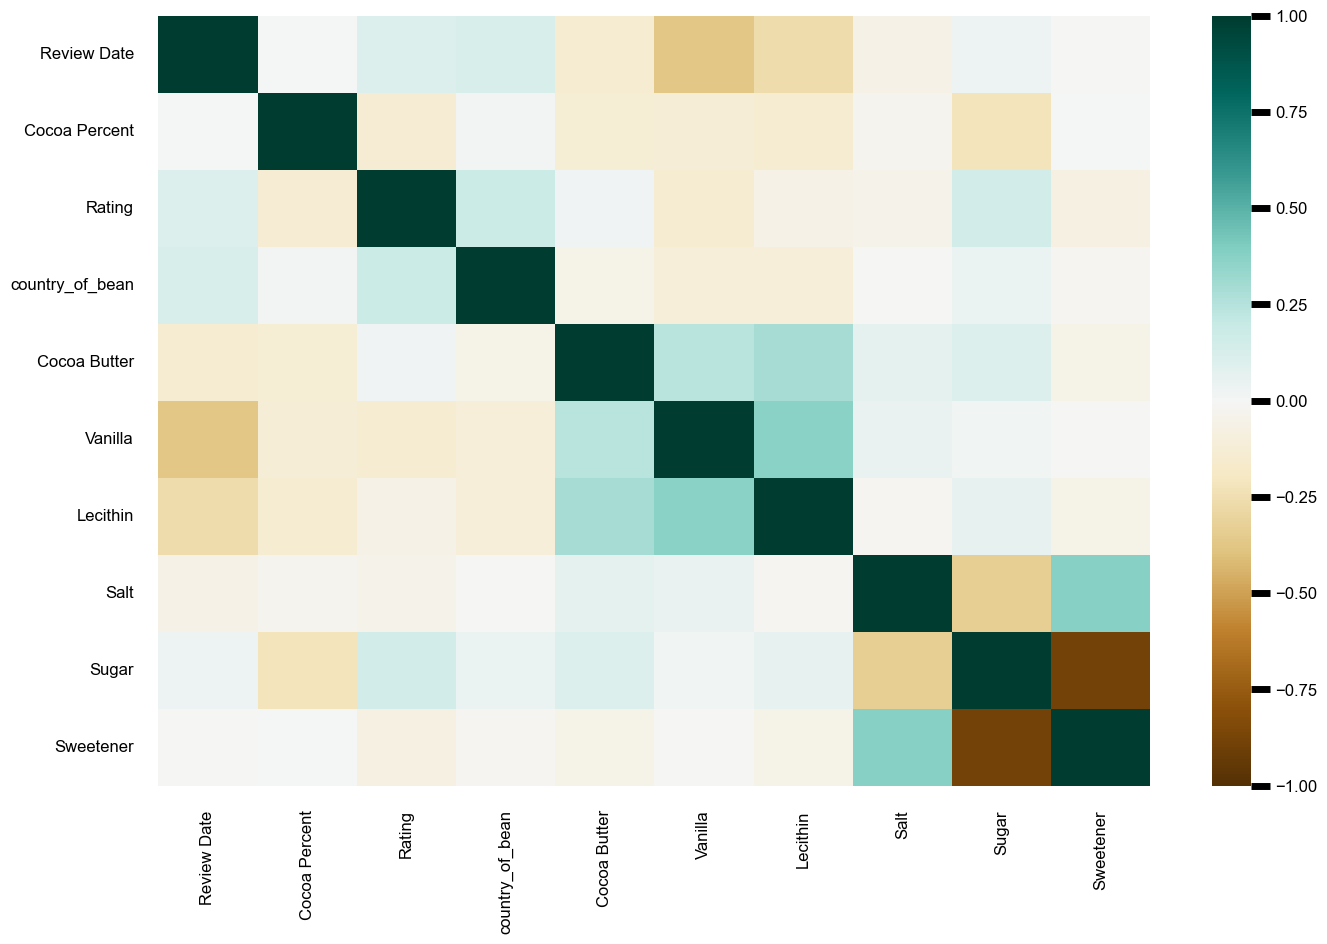

In [88]:
# HeatMAp for correlation
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

fig.savefig('corrs.png')
plt.show()

In [89]:
# Removing one of the correlated features
df_pred = df_pred.drop(columns=['Sweetener'])

In [90]:
df_pred.head()

,Review Date,Cocoa Percent,Rating,country_of_bean,Cocoa Butter,Vanilla,Lecithin,Salt,Sugar
0,2021,68.0,3.50,3.208333,1,0,0,0,1
1,2021,80.0,3.25,3.150000,1,0,0,0,1
2,2021,68.0,3.00,3.062500,1,0,0,0,1
3,2021,72.0,3.00,3.227011,1,0,0,0,1
4,2019,76.0,3.75,3.260526,1,0,0,0,1


In [91]:
numeric_columns = df_pred.loc[:,df_pred.dtypes!=object].columns

In [92]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

x = df_pred.drop(columns=['Rating'], axis=1)
y = df_pred['Rating']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [93]:
# Size of training and test samples
X_train.shape, X_test.shape

((2154, 8), (539, 8))

In [94]:
# Creating a linear regression model
from sklearn.linear_model import LinearRegression


lr =LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [95]:
# Calculate the target for the training and test samples
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [96]:
# Calculating the error for training and test samples
from sklearn.metrics import mean_squared_error

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred).round(3)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred).round(3)

In [97]:
# Cross-validation for linear regression model
from sklearn.model_selection import cross_validate

model = LinearRegression()

cv_result = cross_validate(model, X_train, y_train, 
                           scoring='neg_mean_squared_error',
                           cv=5, return_train_score=True)

cv_train_mse = -np.mean(cv_result['train_score']).round(3) 
cv_test_mse = -np.mean(cv_result['test_score']).round(3) 

In [98]:
# Output of linear regression model error results
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, cv_train_mse, lr_test_mse, cv_test_mse]).transpose()
lr_results.columns = ['Method','Training MSE','CV Training MSE','Test MSE', 'CV Testing MSE']
lr_results

,Method,Training MSE,CV Training MSE,Test MSE,CV Testing MSE
0,Linear regression,0.178,0.178,0.172,0.181


In [99]:
# Building a decision tree for regression
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [100]:
# Calculating the forecast for the training and test samples
y_tree_train_pred = tree.predict(X_train)
y_tree_test_pred = tree.predict(X_test)

In [101]:
# Calculating the error on training and test samples
tree_train_mse = mean_squared_error(y_train, y_tree_train_pred).round(3)
tree_test_mse = mean_squared_error(y_test, y_tree_test_pred).round(3)

In [102]:
# Output of error results of decision tree models
tree_results = pd.DataFrame(['DecisionTree',tree_train_mse, tree_test_mse]).transpose()
tree_results.columns = ['Method','Training MSE','Test MSE']
tree_results

,Method,Training MSE,Test MSE
0,DecisionTree,0.031,0.31
